In [ ]:
from google.colab import drive
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/UnB/IEEE Computational Intelligence Society, UnB/Trainee/Dataset/Periodo 3/creditcard.csv')

In [ ]:
data.shape

(284807, 31)

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

0    284315
1       492
Name: Class, dtype: int64


Text(0, 0.5, 'Numero de Ocorrencias')

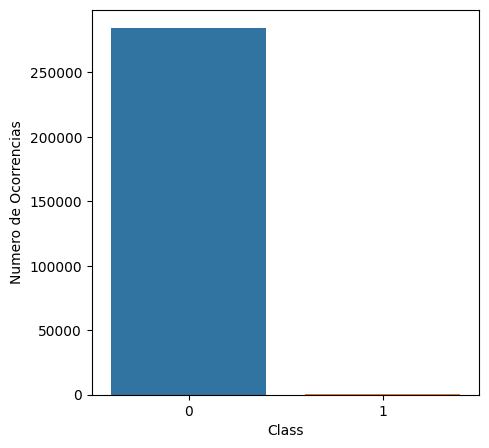

In [ ]:
print(data['Class'].value_counts())
plt.figure(figsize = (5, 5))
sns.countplot(x = data['Class'])
plt.xlabel("Class")
plt.ylabel("Numero de Ocorrencias")

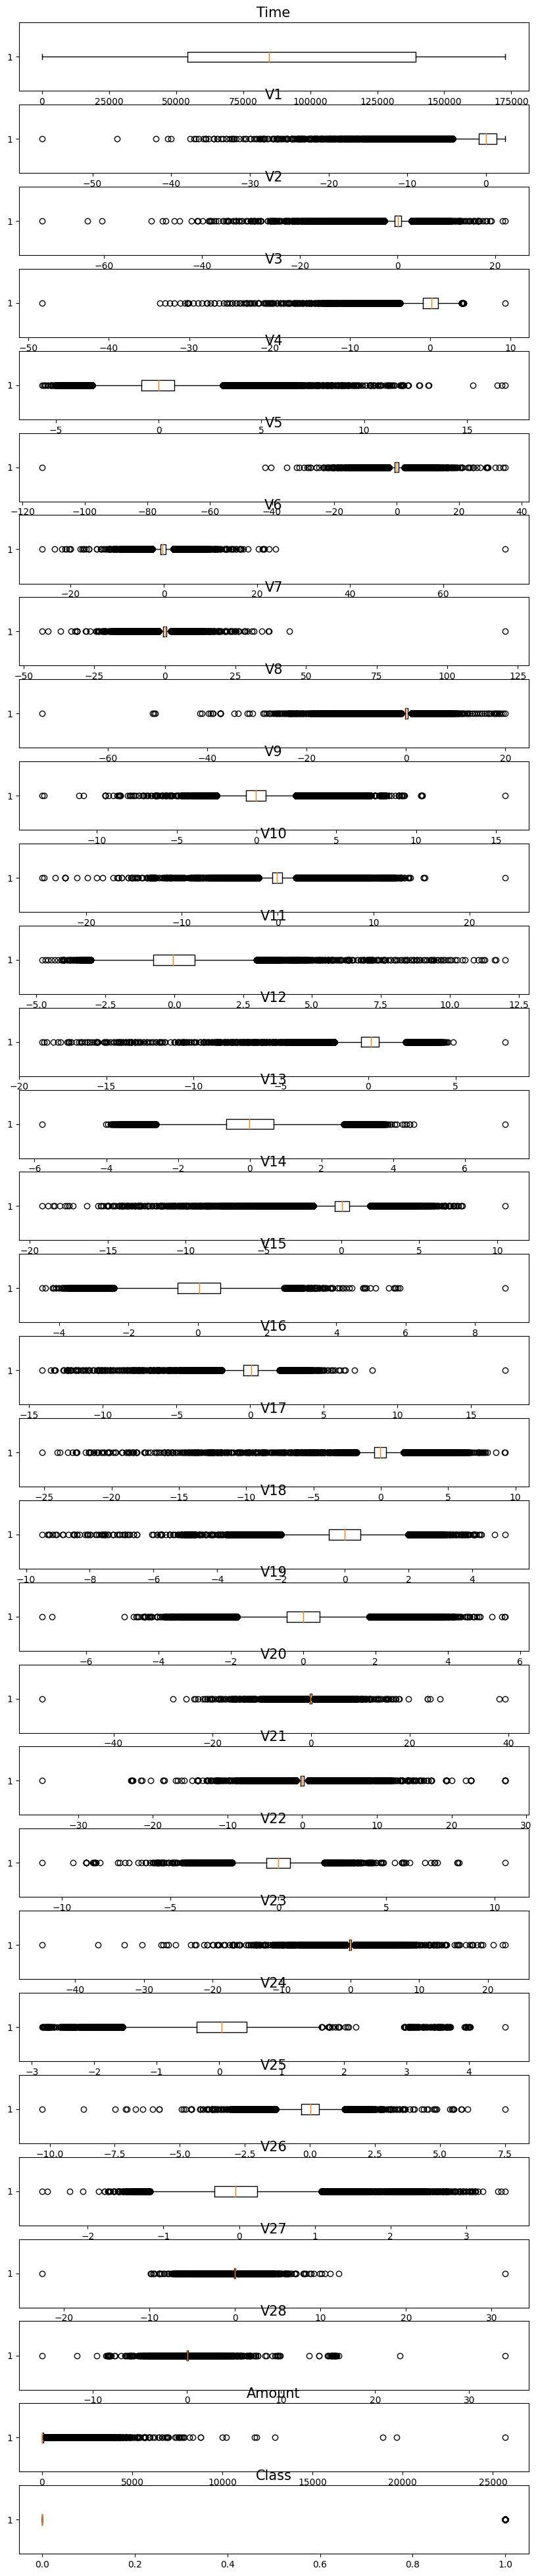

In [ ]:
col = data.columns
fgi, ax = plt.subplots(len(data.columns),1 , figsize = (10,50))
for ind, axi in enumerate(ax.flat):
    axi.boxplot(data[col[ind]], vert = False)
    axi.set_title(col[ind], size = 15)

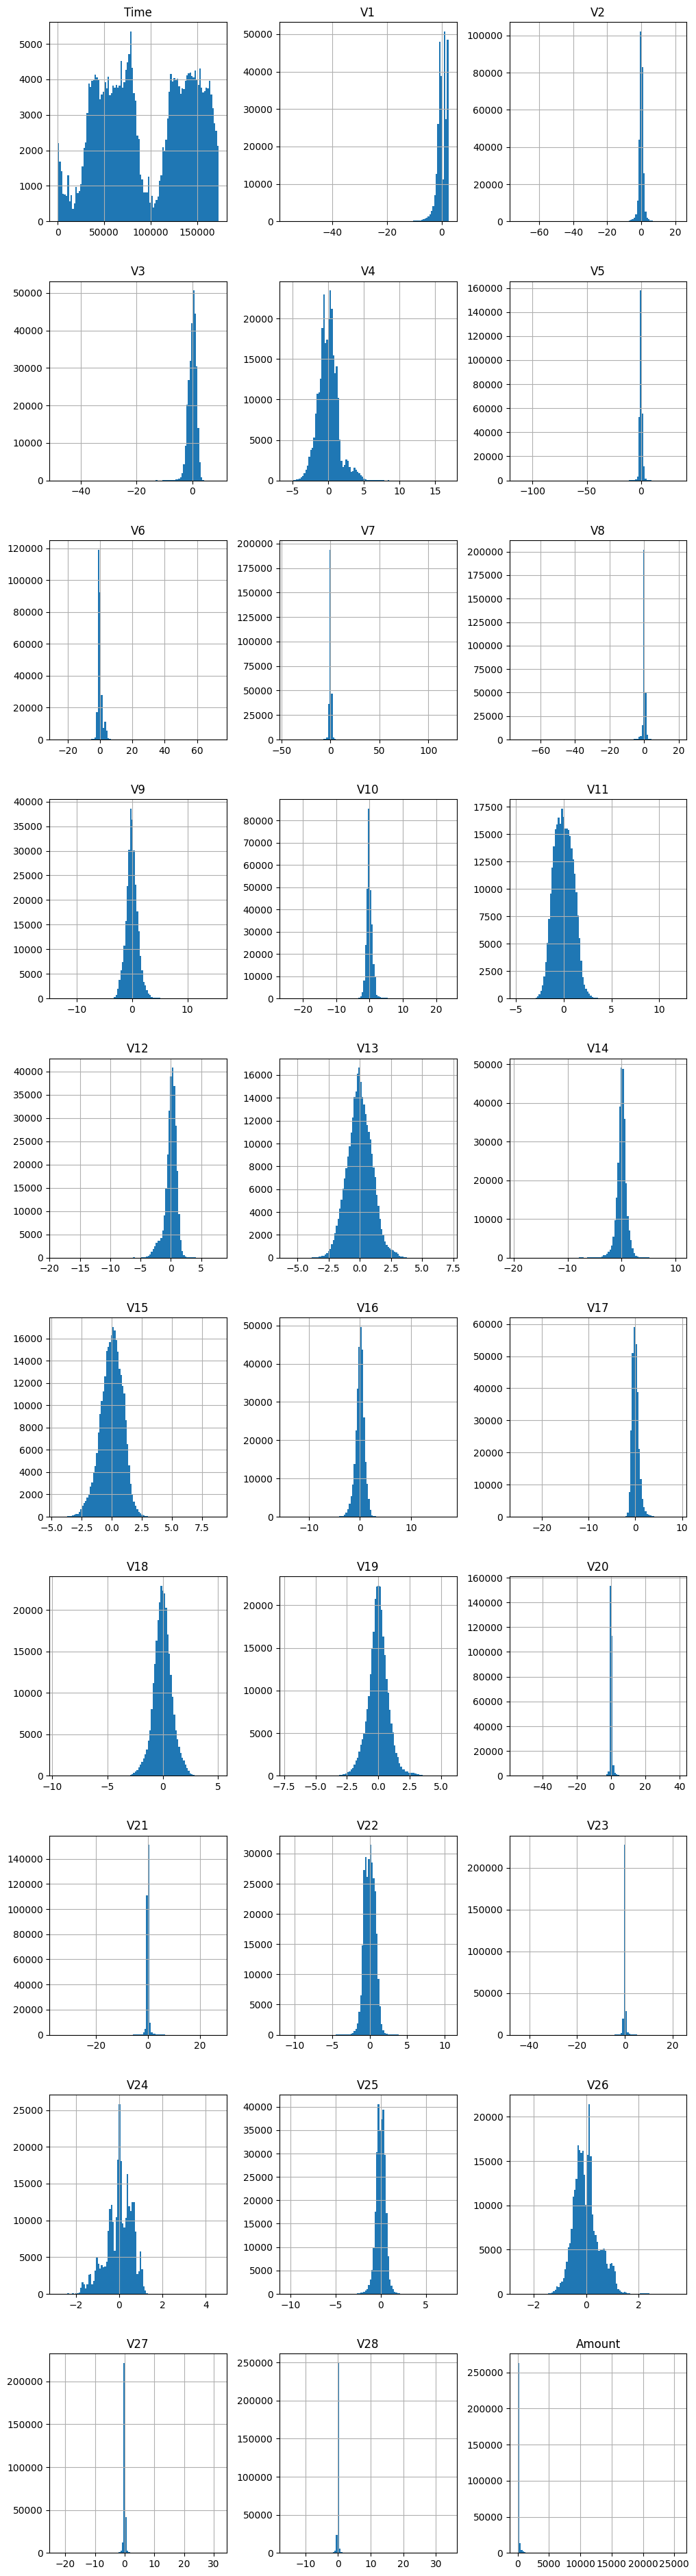

In [ ]:
fig, axes = plt.subplots(len(data.columns)//3, 3, figsize=(12, 48))

i = 0
for triaxis in axes:
    for axis in triaxis:
        data.hist(column = data.columns[i], bins = 100, ax=axis)
        i = i+1

<Axes: >

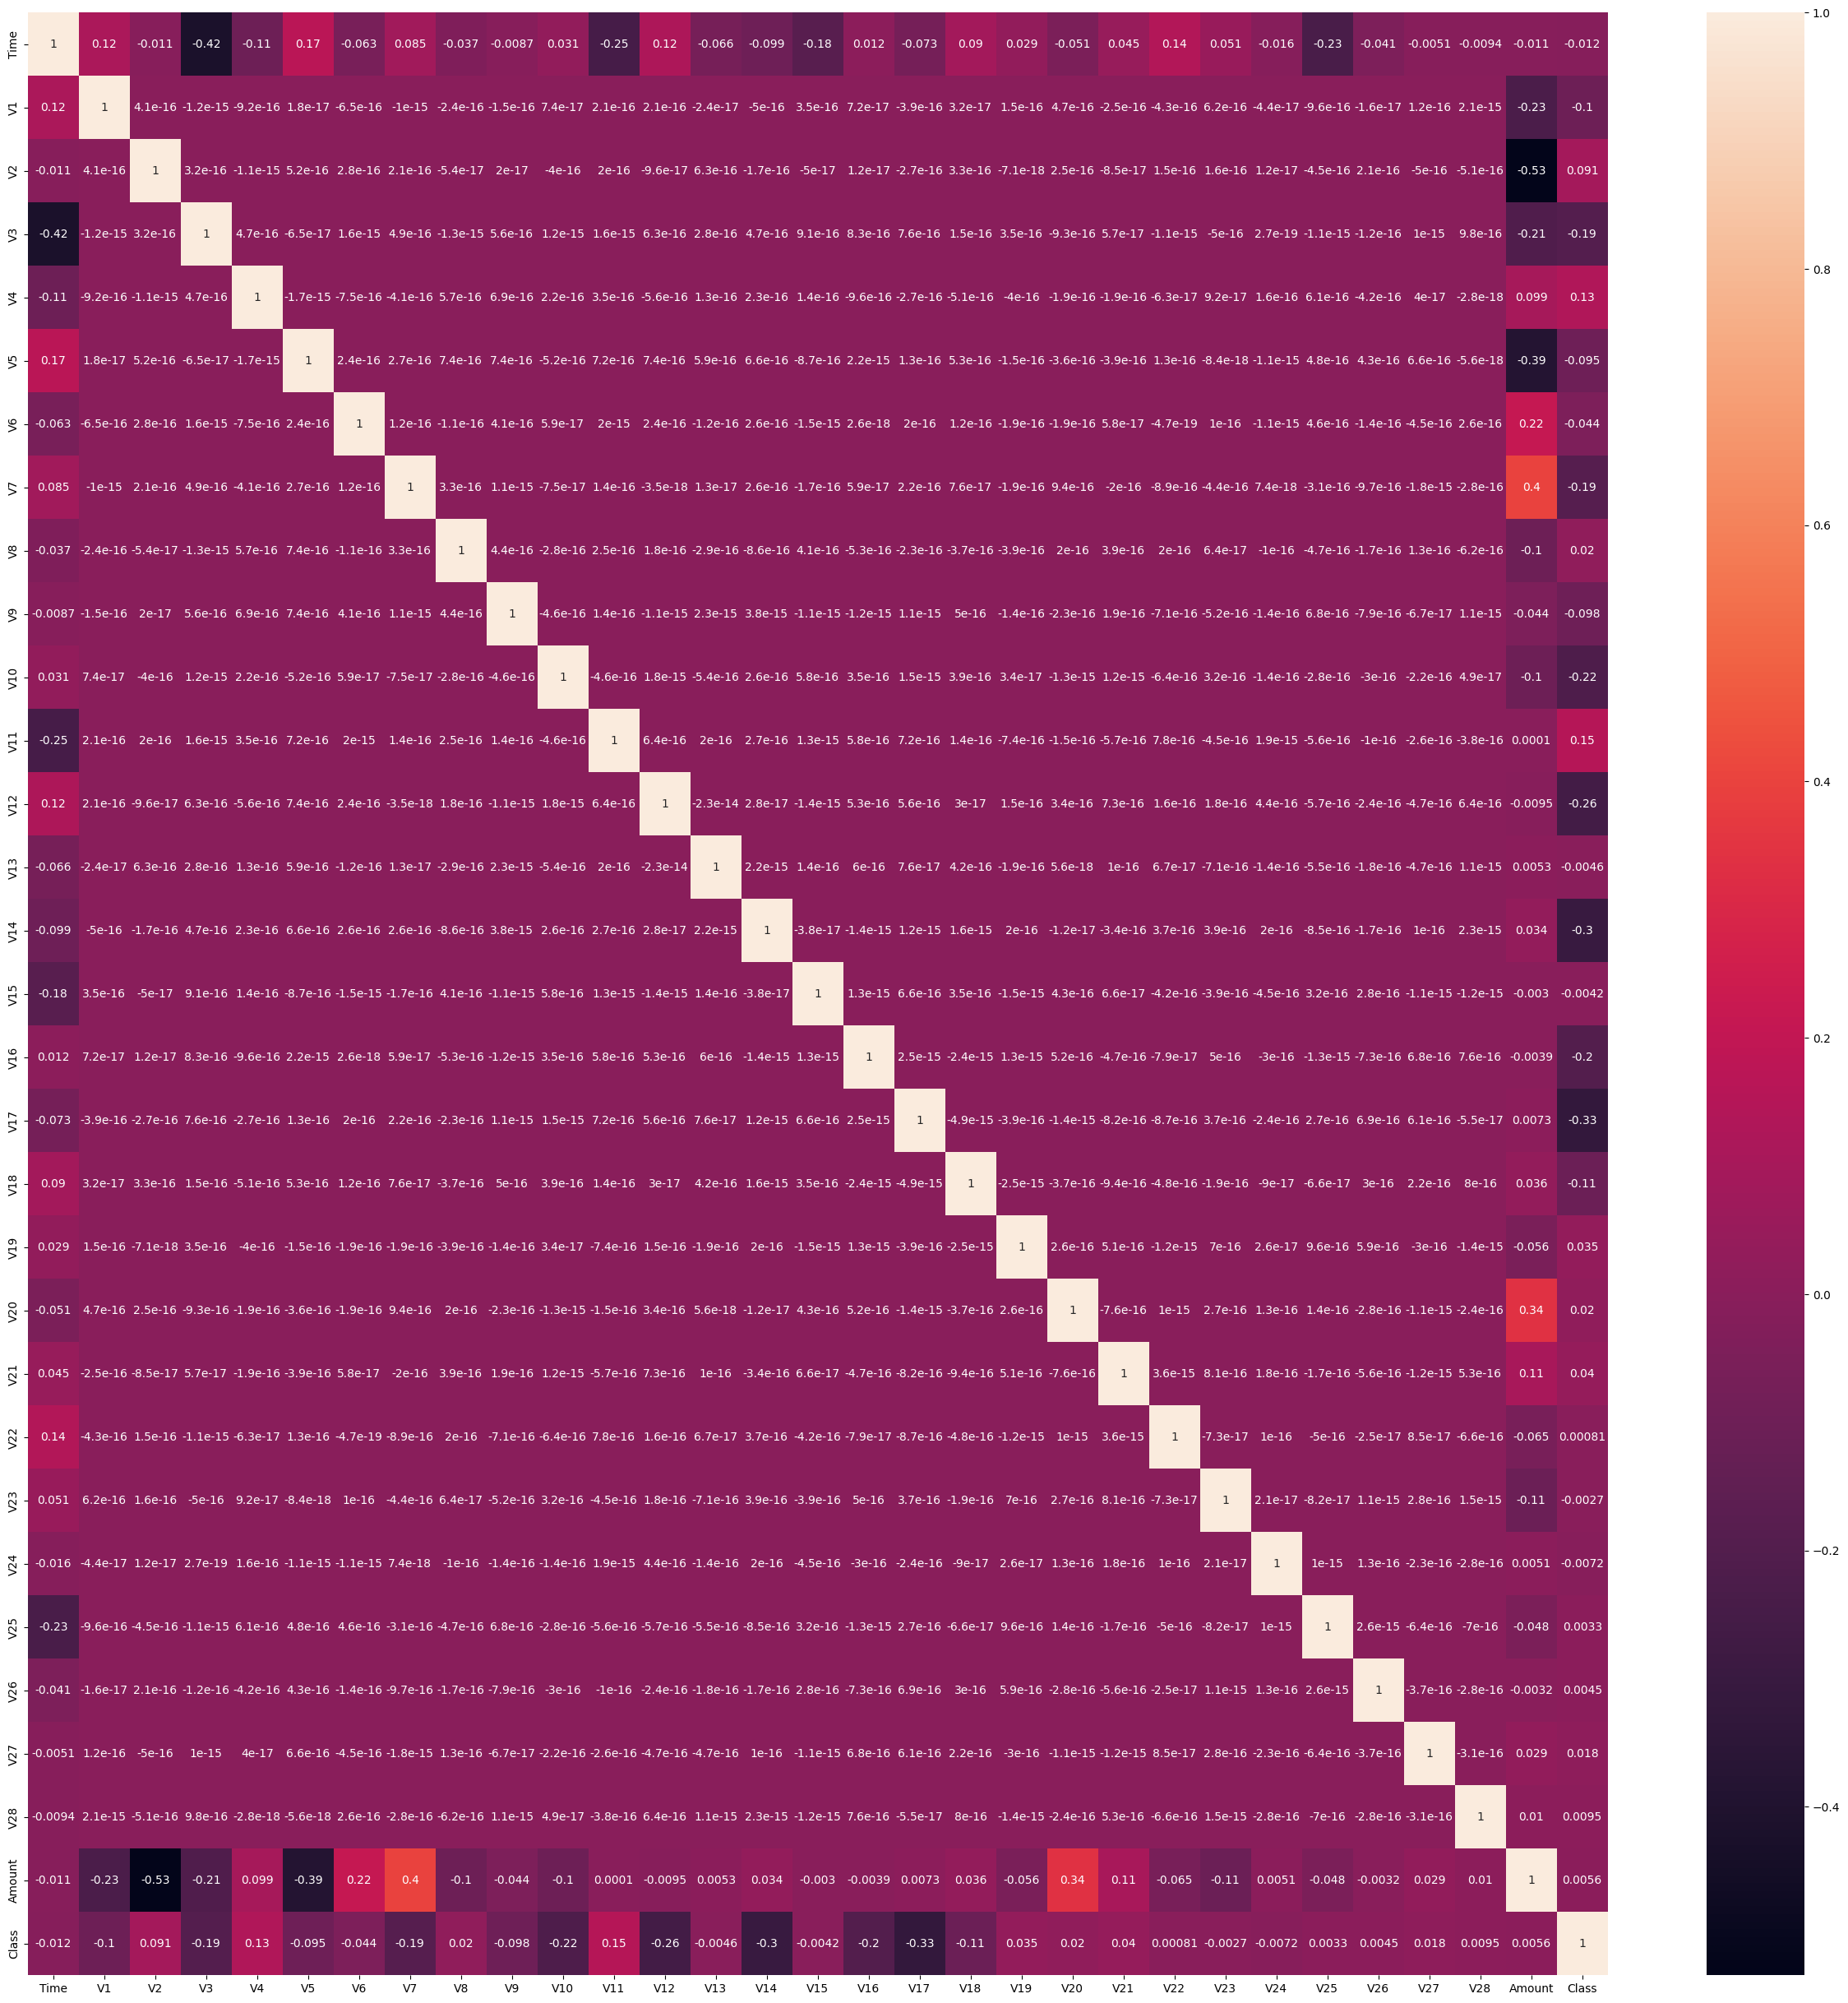

In [ ]:
correl = data.corr()
plt.figure(figsize =  (31,31))
sns.heatmap(correl, annot = True)

In [ ]:
print(correl['Class'].sort_values(ascending = False))

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


In [ ]:
data_o = data
Fraudes = data.groupby("Class").get_group(1)
Legit = data.groupby("Class").get_group(0)
Legit_crop = Legit.head(len(Fraudes))


In [ ]:
Fraudes.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [ ]:
data = pd.concat([Fraudes, Legit_crop], ignore_index=True)

In [ ]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,144839.0,-6.423306,1.658515,-5.866440,2.052064,-0.615817,-3.372266,-5.036556,2.643106,-2.274630,...,0.641211,-0.256678,-2.337233,-0.158278,1.198797,-0.261258,0.780125,-0.731801,0.00,1
1,298.0,1.218417,0.077792,0.533944,0.843849,-0.536022,-0.702281,0.006656,-0.153411,0.421584,...,-0.224558,-0.466722,0.003663,0.438026,0.460760,0.267056,-0.021916,0.014812,13.99,0
2,315.0,-1.014693,0.444918,2.259005,0.336946,-0.492326,-0.649977,0.542460,-0.201798,0.491987,...,0.090761,0.829358,-0.105669,1.005763,-0.098694,0.396781,0.307894,0.098746,69.99,0
3,141320.0,-6.352337,-2.370335,-4.875397,2.335045,-0.809555,-0.413647,-4.082308,2.239089,-1.986360,...,1.325218,1.226745,-1.485217,-1.470732,-0.240053,0.112972,0.910591,-0.650944,195.66,1
4,183.0,0.726749,-0.528042,0.050366,1.373621,-0.124122,0.415688,0.259555,0.085114,-0.003025,...,0.061888,-0.101838,-0.308373,-0.270673,0.604410,-0.333689,-0.003944,0.040685,224.97,0


1    492
0    492
Name: Class, dtype: int64


Text(0, 0.5, 'Numero de Ocorrencias')

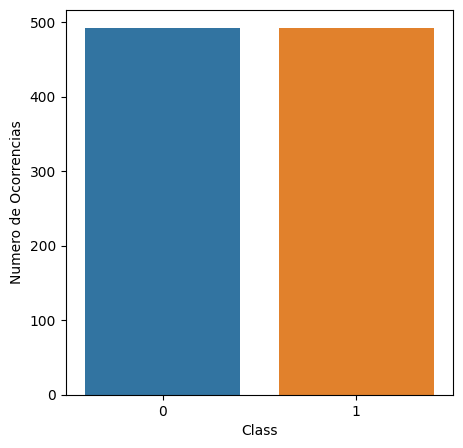

In [ ]:
print(data['Class'].value_counts())
plt.figure(figsize = (5, 5))
sns.countplot(x = data['Class'])
plt.xlabel("Class")
plt.ylabel("Numero de Ocorrencias")

<Axes: >

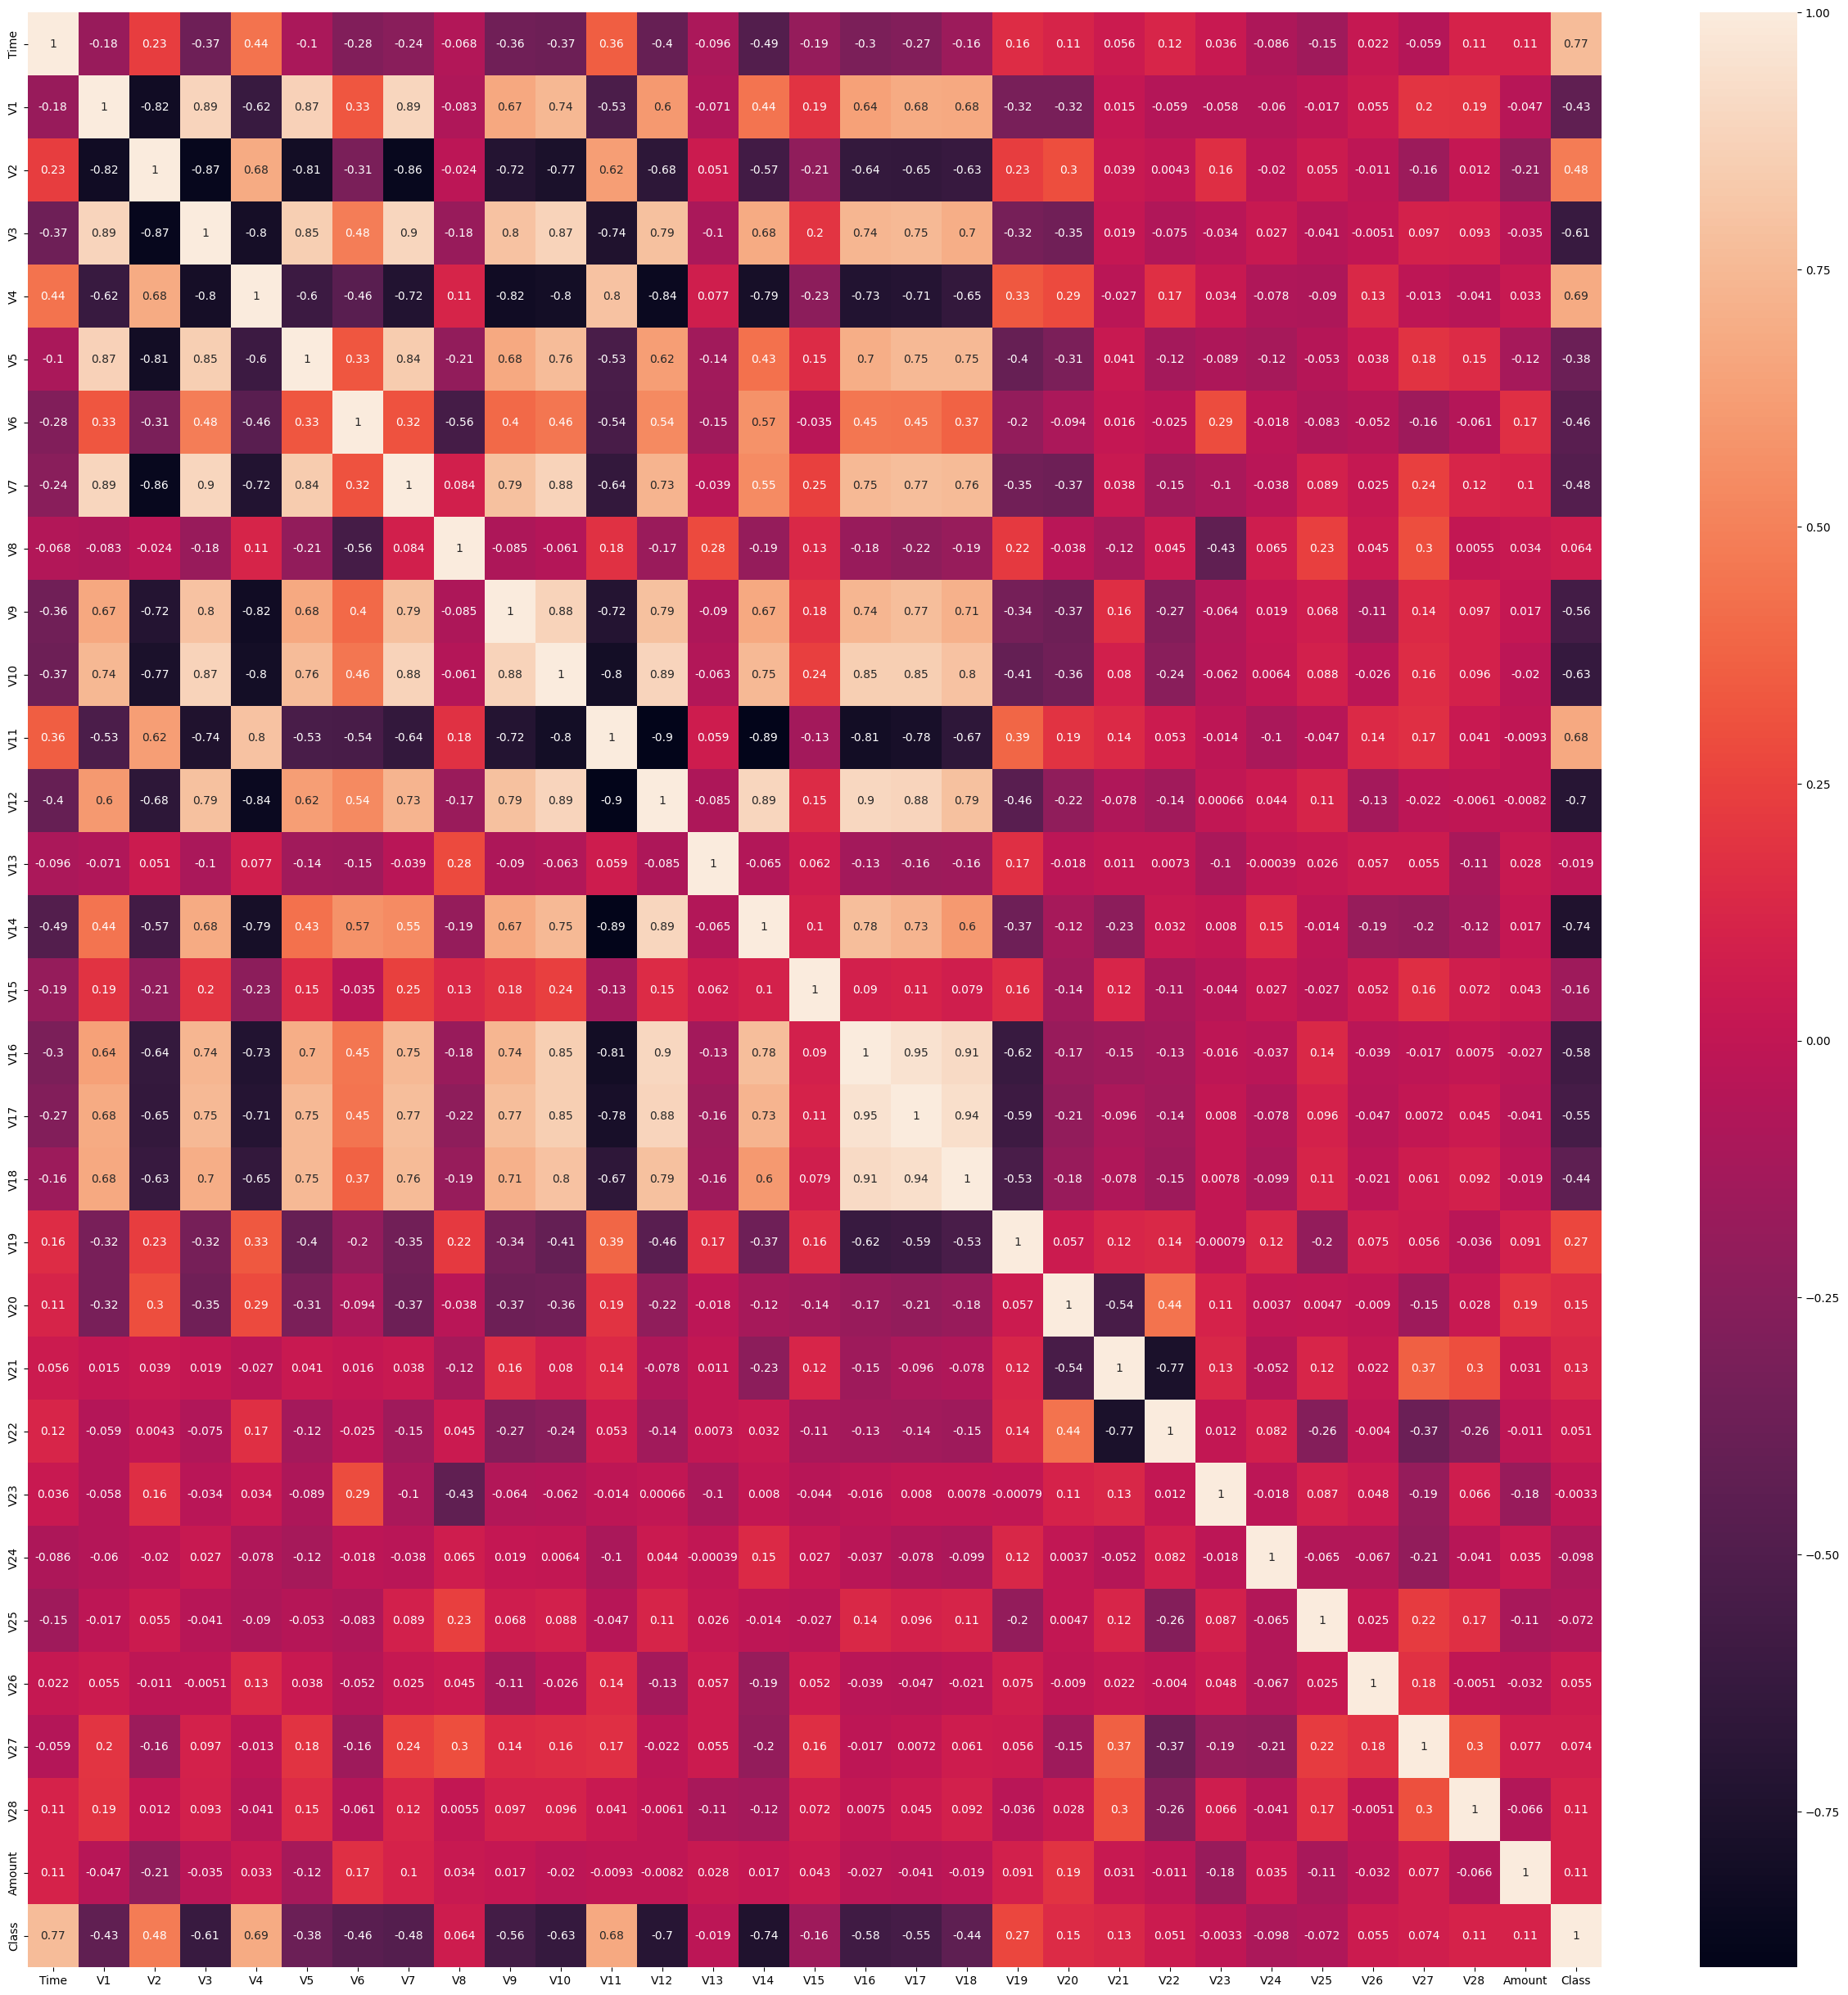

In [ ]:
correl = data.corr()
plt.figure(figsize =  (31,31))
sns.heatmap(correl, annot = True)

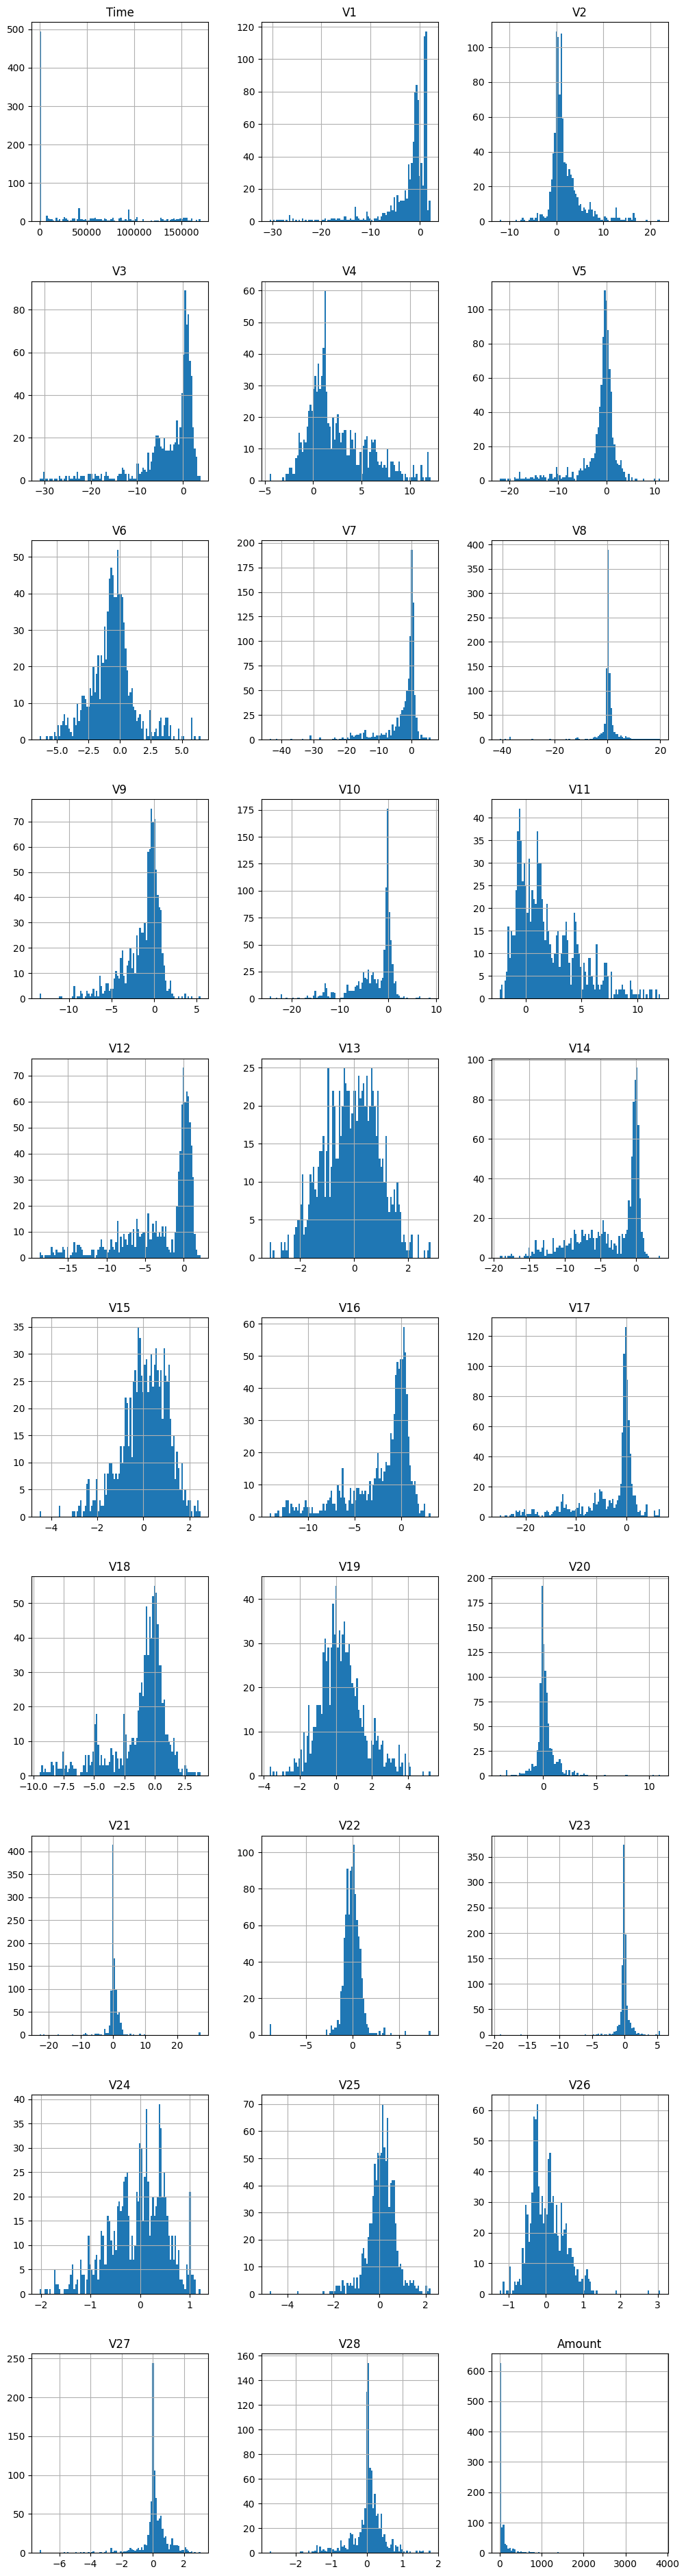

In [ ]:
fig, axes = plt.subplots(len(data.columns)//3, 3, figsize=(12, 48))

i = 0
for triaxis in axes:
    for axis in triaxis:
        data.hist(column = data.columns[i], bins = 100, ax=axis)
        i = i+1

In [ ]:
data = data.to_numpy()
data_o = data_o.to_numpy()

In [ ]:
def normalize(data):
  dataNormal_np = data-data.min(axis=0)
  dataNormal_np = dataNormal_np/dataNormal_np.max(axis=0)
  return dataNormal_np

def accuracy_score(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred, axis=0) / len(y_true)
    return accuracy

data = normalize(data)
data_o = normalize(data_o)
split = 0.2
treino = np.array(data[0:int(split*len(data))])
teste = np.array(data[int(split*len(data)):-1])
#treino = data
#teste = data_o

y_train = treino[:, [-1]]
X_train = treino[:,:-1]
y_test = teste[:, [-1]]
X_test = teste[:,:-1]


print(f'Tipo treino {type(y_train)}')
print(f'Maximo treino {max(list(y_train))}')
print(f'Maximo teste {max(list(y_test))}')


Tipo treino <class 'numpy.ndarray'>
Maximo treino [1.]
Maximo teste [1.]


In [ ]:
class MLP(object):

    def __init__(self, num_inputs=3, hidden_layers=[3], num_outputs=2):
        '''Criação do perceptron de múltiplas camadas

            num_inputs (inteiro): Número de inputs
            hidden_layers (lista): Lista de inteiros cujo comprimento é o número de camadas ocultas
            num_outputs (int): Number of outputs
       '''

        self.num_inputs = num_inputs
        self.hidden_layers = hidden_layers
        self.num_outputs = num_outputs

        layers = [num_inputs] + hidden_layers + [num_outputs]

        # cria pesos aleatórios para as ligações entre as camadas
        weights = []
        for i in range(len(layers) - 1):
            w = np.random.rand(layers[i], layers[i + 1])
            weights.append(w)
        self.weights = weights

        # salva derivadas por camada
        derivatives = []
        for i in range(len(layers) - 1):
            d = np.zeros((layers[i], layers[i + 1]))
            derivatives.append(d)
        self.derivatives = derivatives

        # salva ativações por camada
        activations = []
        for i in range(len(layers)):
            a = np.zeros(layers[i])
            activations.append(a)
        self.activations = activations


    def forward_propagate(self, inputs):
        """Forward propagation da rede neural.

        Args:
            inputs (ndarray): Input signals
        Returns:
            activations (ndarray): Output values
        """

        # the input layer activation is just the input itself
        activations = inputs

        # save the activations for backpropogation
        self.activations[0] = activations

        # iterate through the network layers
        for i, w in enumerate(self.weights):
            # calculate matrix multiplication between previous activation and weight matrix
            net_inputs = np.dot(activations, w)

            # apply sigmoid activation function
            activations = self._sigmoid(net_inputs)

            # save the activations for backpropogation
            self.activations[i + 1] = activations

        # return output layer activation
        return activations


    def back_propagate(self, error):
        """Backpropagates an error signal.
        Args:
            error (ndarray): The error to backprop.
        Returns:
            error (ndarray): The final error of the input
        """
        for i in reversed(range(len(self.derivatives))):

            activations = self.activations[i+1]

            delta = error * self._sigmoid_derivative(activations)

            delta_re = delta.reshape(delta.shape[0], -1).T

            current_activations = self.activations[i]

            current_activations = current_activations.reshape(current_activations.shape[0],-1)

            self.derivatives[i] = np.dot(current_activations, delta_re)

            error = np.dot(delta, self.weights[i].T)


    def train(self, inputs, targets, epochs, learning_rate):
        """Trains model running forward prop and backprop
        Args:
            inputs (ndarray): X
            targets (ndarray): Y
            epochs (int): Num. epochs we want to train the network for
            learning_rate (float): Step to apply to gradient descent
        """
        for i in range(epochs):
            sum_errors = 0

            for j, input in enumerate(inputs):
                target = targets[j]

                output = self.forward_propagate(input)

                error = target - output

                self.back_propagate(error)


                self.gradient_descent(learning_rate)


                sum_errors += self._mse(target, output)

            print("Erro: {} na época {}".format(sum_errors / len(items), i+1))

        print("Trainamento completo!")
        print("=====")


    def gradient_descent(self, learningRate=1):
        """Learns by descending the gradient
        Args:
            learningRate (float): How fast to learn.
        """
        for i in range(len(self.weights)):
            weights = self.weights[i]
            derivatives = self.derivatives[i]
            weights += derivatives * learningRate


    def _sigmoid(self, x):
        """Sigmoid activation function
        Args:
            x (float): Value to be processed
        Returns:
            y (float): Output
        """

        y = 1.0 / (1 + np.exp(-x))
        return y


    def _sigmoid_derivative(self, x):
        """Sigmoid derivative function
        Args:
            x (float): Value to be processed
        Returns:
            y (float): Output
        """
        return x * (1.0 - x)


    def _mse(self, target, output):
        """Mean Squared Error loss function
        Args:
            target (ndarray): The ground trut
            output (ndarray): The predicted values
        Returns:
            (float): Output
        """
        return np.average((target - output) ** 2)



In [ ]:
items = (X_train)
targets = (y_train)

# create a Multilayer Perceptron with one hidden layer
mlp = MLP(30, [10,10], 1)

# train network
mlp.train(items, targets, 100, 0.001)

input = X_test
target = y_test

# get a prediction
output = mlp.forward_propagate(input)



Erro: 0.45143002701633705 na época 1
Erro: 0.45096783469294105 na época 2
Erro: 0.4504878572110538 na época 3
Erro: 0.44998909712930574 na época 4
Erro: 0.4494704843105999 na época 5
Erro: 0.44893086947826716 na época 6
Erro: 0.4483690171095453 na época 7
Erro: 0.4477835975905272 na época 8
Erro: 0.4471731785475115 na época 9
Erro: 0.4465362152593949 na época 10
Erro: 0.44587104004423067 na época 11
Erro: 0.445175850500331 na época 12
Erro: 0.4444486964681083 na época 13
Erro: 0.4436874655633272 na época 14
Erro: 0.4428898671154654 na época 15
Erro: 0.44205341432652306 na época 16
Erro: 0.4411754044461558 na época 17
Erro: 0.44025289673860035 na época 18
Erro: 0.43928268799623543 na época 19
Erro: 0.4382612853345452 na época 20
Erro: 0.43718487598514577 na época 21
Erro: 0.4360492937894366 na época 22
Erro: 0.43484998208821657 na época 23
Erro: 0.43358195270659194 na época 24
Erro: 0.43223974075462024 na época 25
Erro: 0.4308173550109158 na época 26
Erro: 0.42930822374054894 na época 2